In [1]:
import pandas as pd
import numpy as np 


In [2]:
df = pd.read_parquet("anime_data_feature_engineered.parquet")

In [3]:
print(df.columns)

Index(['anime_id', 'anime_url', 'title', 'synopsis', 'main_pic', 'type',
       'source_type', 'num_episodes', 'status', 'start_date', 'end_date',
       'season', 'studios', 'genres', 'score', 'score_count', 'score_rank',
       'popularity_rank', 'members_count', 'favorites_count', 'watching_count',
       'completed_count', 'on_hold_count', 'dropped_count',
       'plan_to_watch_count', 'total_count', 'score_10_count',
       'score_09_count', 'score_08_count', 'score_07_count', 'score_06_count',
       'score_05_count', 'score_04_count', 'score_03_count', 'score_02_count',
       'score_01_count', 'clubs', 'pics', 'duration', 'release_year'],
      dtype='object')


In [4]:
import matplotlib.pyplot as plt
import seaborn as sns

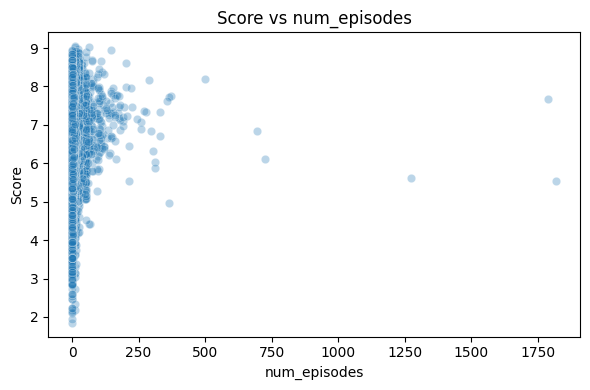

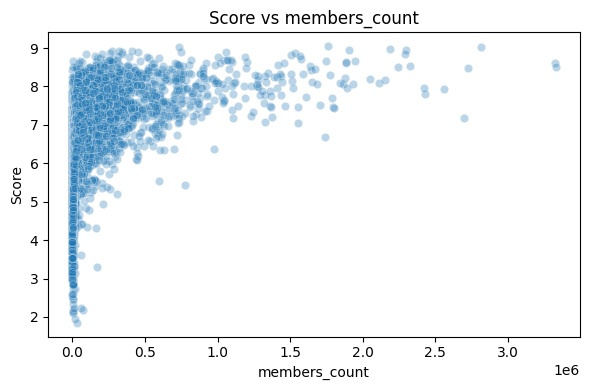

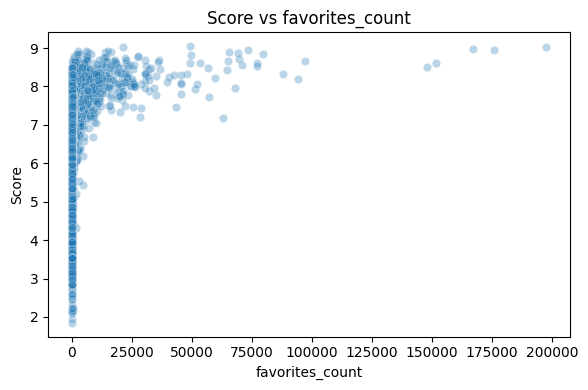

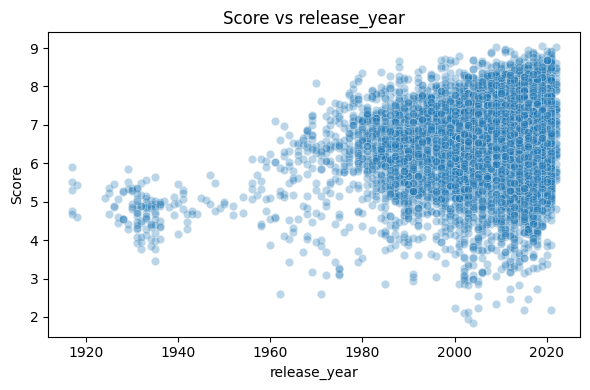

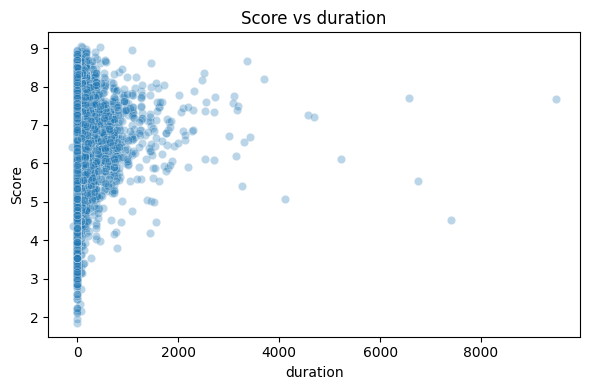

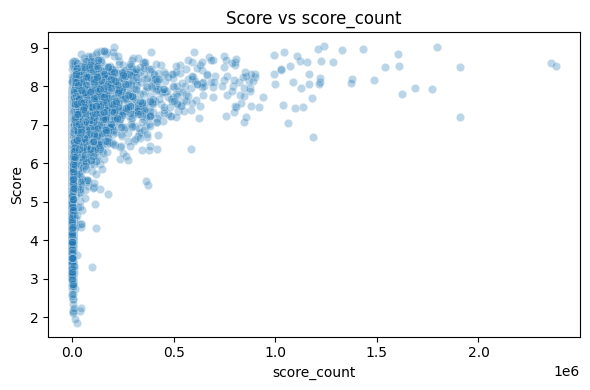

In [5]:


numerical_features = ['num_episodes', 'members_count', 'favorites_count', 'release_year', 'duration', 'score_count']

for feature in numerical_features:
    plt.figure(figsize=(6, 4))
    sns.scatterplot(data=df, x=feature, y='score', alpha=0.3)
    plt.title(f'Score vs {feature}')
    plt.xlabel(feature)
    plt.ylabel('Score')
    plt.tight_layout()
    plt.show()


i noticed how a lottt of the score values are centred around animes with one episode. so pulling up the frequency of that:

In [6]:
df['num_episodes'].value_counts().sort_index()


num_episodes
1       4045
2       1046
3        451
4        350
5        102
        ... 
694        1
726        1
1274       1
1787       1
1818       1
Name: count, Length: 166, dtype: int64

4045 anime have just 1 episode. then i realised these are also anime movies or other types like OVA or special, etc 

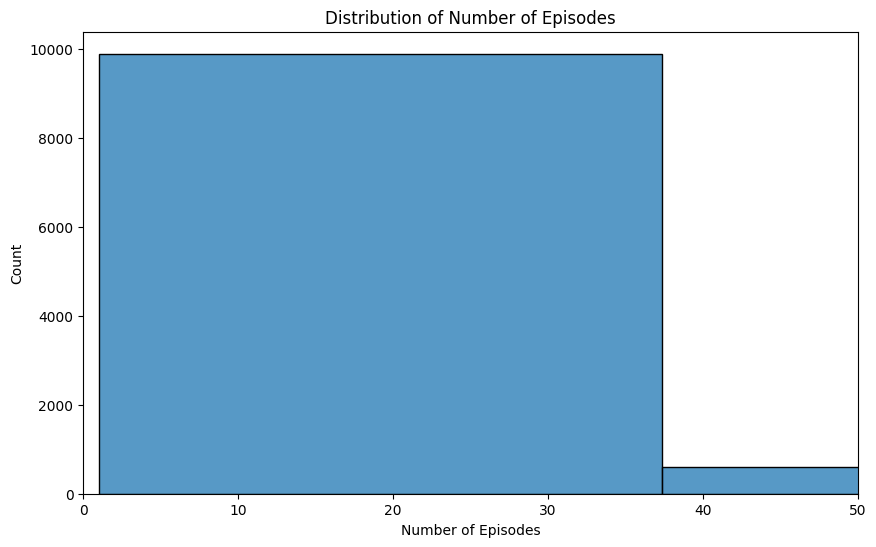

In [7]:
plt.figure(figsize=(10, 6))
sns.histplot(df['num_episodes'], bins=50, kde=False)
plt.title("Distribution of Number of Episodes")
plt.xlabel("Number of Episodes")
plt.ylabel("Count")
plt.xlim(0, 50)  # limit to 0–200 if you want to ignore long series
plt.show()


a little less than 10k anime have number of episodes < 40 

In [8]:
df['type'].unique()


array(['TV', 'ONA', 'OVA', 'Movie', 'Special'], dtype=object)

In [9]:
df['type'].value_counts()


type
TV         3683
OVA        2587
Movie      1675
Special    1488
ONA        1216
Name: count, dtype: int64

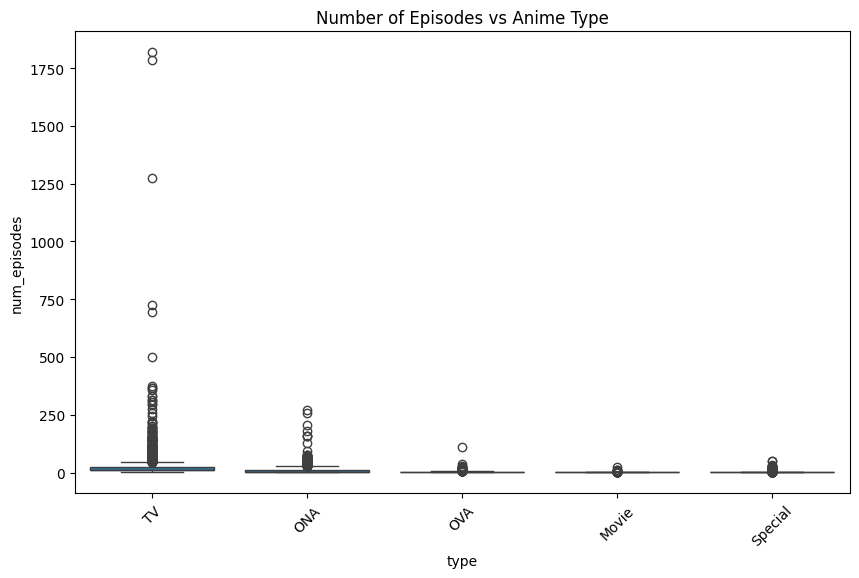

In [10]:
plt.figure(figsize=(10, 6))
sns.boxplot(data=df, x='type', y='num_episodes')
plt.title('Number of Episodes vs Anime Type')
plt.xticks(rotation=45)
plt.show()

C:\Users\chand\AppData\Local\Temp\ipykernel_31224\3788021254.py:4: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=type_counts.index, y=type_counts.values, palette='muted')


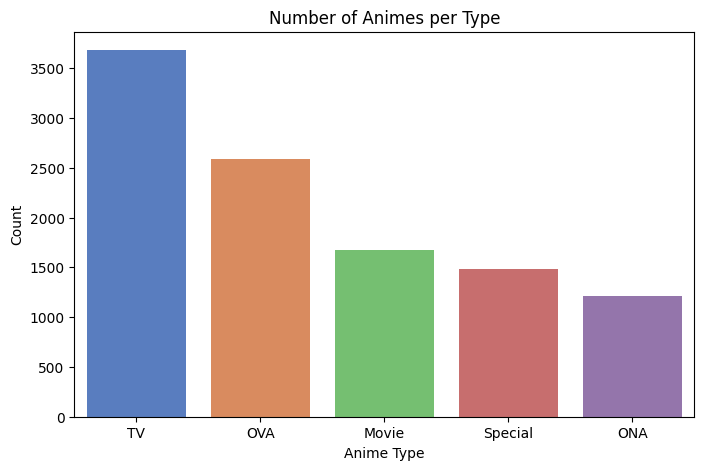

In [19]:
type_counts = df['type'].value_counts()

plt.figure(figsize=(8, 5))
sns.barplot(x=type_counts.index, y=type_counts.values, palette='muted')
plt.title('Number of Animes per Type')
plt.ylabel('Count')
plt.xlabel('Anime Type')
plt.show()

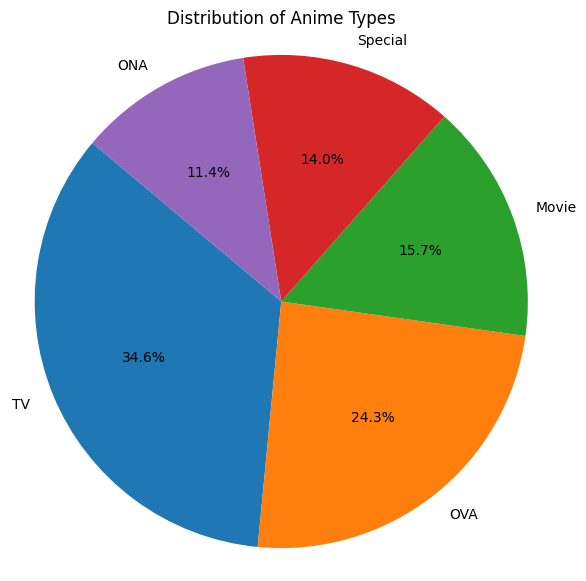

In [20]:
plt.figure(figsize=(7, 7))
plt.pie(type_counts.values, labels=type_counts.index, autopct='%1.1f%%', startangle=140)
plt.title('Distribution of Anime Types')
plt.axis('equal')  # Equal aspect ratio ensures the pie is drawn as a circle
plt.show()


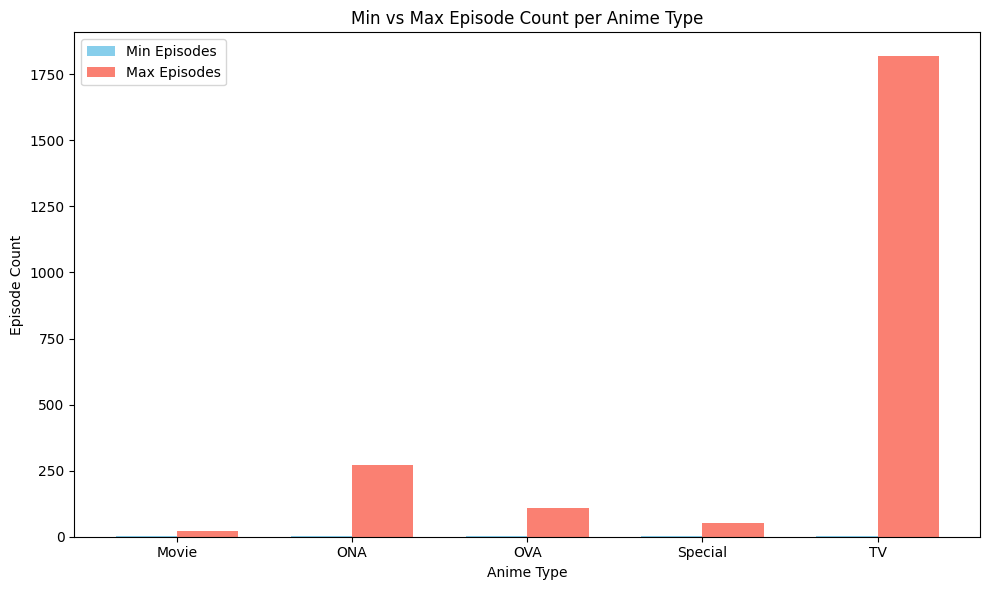

In [21]:
episode_stats = df.groupby('type')['num_episodes'].agg(['min', 'max']).reset_index()

# Plotting
x = episode_stats['type']
min_vals = episode_stats['min']
max_vals = episode_stats['max']
bar_width = 0.35
x_indexes = range(len(x))

plt.figure(figsize=(10, 6))

# Plot min bars
plt.bar([i - bar_width/2 for i in x_indexes], min_vals, width=bar_width, color='skyblue', label='Min Episodes')

# Plot max bars
plt.bar([i + bar_width/2 for i in x_indexes], max_vals, width=bar_width, color='salmon', label='Max Episodes')

# Labeling
plt.xticks(ticks=x_indexes, labels=x)
plt.xlabel('Anime Type')
plt.ylabel('Episode Count')
plt.title('Min vs Max Episode Count per Anime Type')
plt.legend()
plt.tight_layout()
plt.show()

okay so this was supposed to be a grouped bar chart of min and max number of episodes for each type but the min for all is zero lol... that raises another problem. should the data set have animes with 0 episodes? 

In [22]:
print("Zero episodes:", (df['num_episodes'] == 0).sum())
print("NaN episodes :", df['num_episodes'].isna().sum())


Zero episodes: 0
NaN episodes : 0


In [23]:
df.groupby("type")["num_episodes"].min()


type
Movie      1
ONA        1
OVA        1
Special    1
TV         2
Name: num_episodes, dtype: int64

okay so 
maybe because the y axis was scaled to be so huge, 0 and 1 and 2 also just hugged the x axis and we couldnt see it 

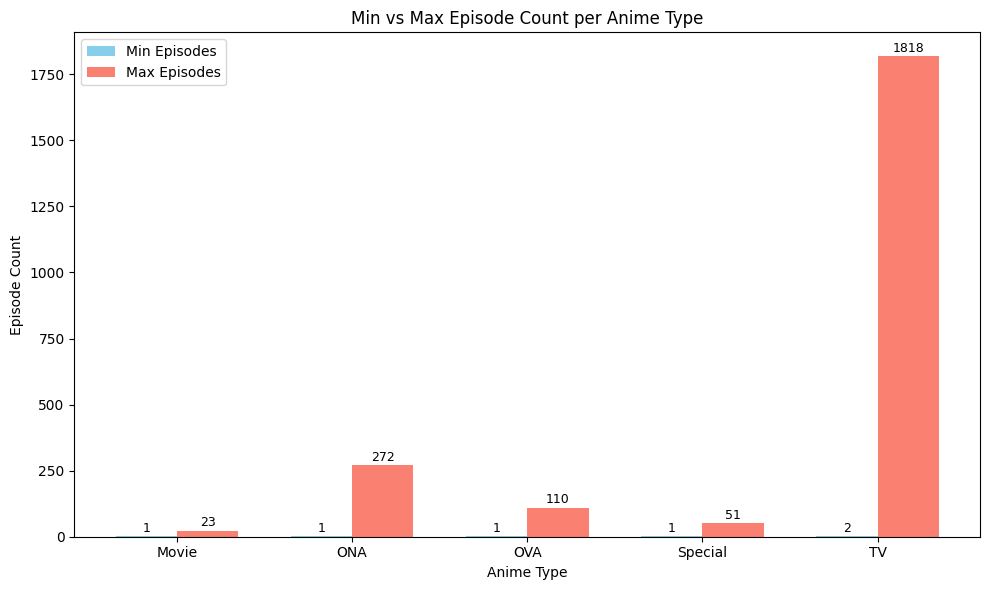

In [25]:


episode_stats = df.groupby('type')['num_episodes'].agg(['min', 'max']).reset_index()

# Plotting
x = episode_stats['type']
min_vals = episode_stats['min']
max_vals = episode_stats['max']
bar_width = 0.35
x_indexes = range(len(x))

plt.figure(figsize=(10, 6))

# Plot min bars
min_bars = plt.bar([i - bar_width/2 for i in x_indexes], min_vals, width=bar_width, color='skyblue', label='Min Episodes')

# Plot max bars
max_bars = plt.bar([i + bar_width/2 for i in x_indexes], max_vals, width=bar_width, color='salmon', label='Max Episodes')

# Add value labels on bars
for bar in min_bars + max_bars:
    height = bar.get_height()
    plt.text(bar.get_x() + bar.get_width()/2, height + 5, str(int(height)), ha='center', va='bottom', fontsize=9)

# Labeling
plt.xticks(ticks=x_indexes, labels=x)
plt.xlabel('Anime Type')
plt.ylabel('Episode Count')
plt.title('Min vs Max Episode Count per Anime Type')
plt.legend()
plt.tight_layout()
plt.show()


seems like TV is the only currect one cz cmon its not a series until its more than 1 episode 
but whats going on with movies... how can there be 23 episodes in a movie!?

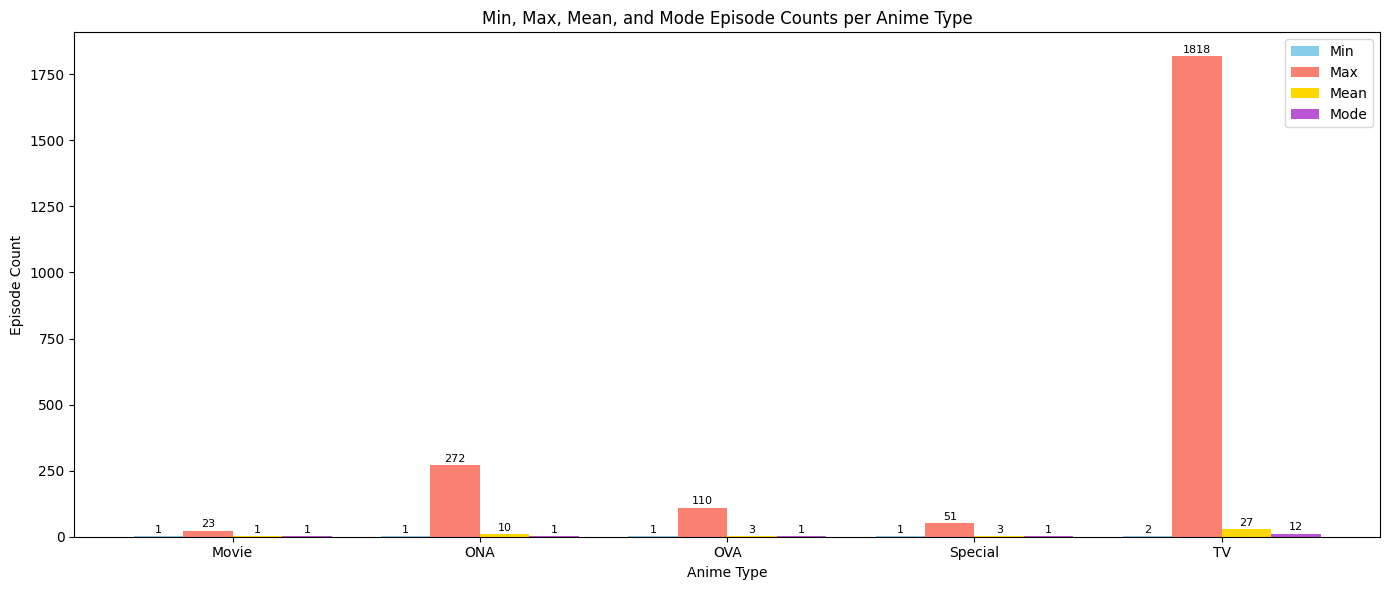

In [11]:


# Compute mode manually per type (since pandas mode returns Series)
mode_vals = df.groupby('type')['num_episodes'].agg(lambda x: x.mode().iloc[0] if not x.mode().empty else None)

# Compute min, max, mean
episode_stats = df.groupby('type')['num_episodes'].agg(['min', 'max', 'mean']).reset_index()

# Add mode to the dataframe
episode_stats['mode'] = episode_stats['type'].map(mode_vals)

# Plotting
x = episode_stats['type']
min_vals = episode_stats['min']
max_vals = episode_stats['max']
mean_vals = episode_stats['mean']
mode_vals = episode_stats['mode']

bar_width = 0.2
x_indexes = range(len(x))

plt.figure(figsize=(14, 6))

# Plot bars
min_bars = plt.bar([i - 1.5*bar_width for i in x_indexes], min_vals, width=bar_width, color='skyblue', label='Min')
max_bars = plt.bar([i - 0.5*bar_width for i in x_indexes], max_vals, width=bar_width, color='salmon', label='Max')
mean_bars = plt.bar([i + 0.5*bar_width for i in x_indexes], mean_vals, width=bar_width, color='gold', label='Mean')
mode_bars = plt.bar([i + 1.5*bar_width for i in x_indexes], mode_vals, width=bar_width, color='mediumorchid', label='Mode')

# Add value labels on each bar
for bar_group in [min_bars, max_bars, mean_bars, mode_bars]:
    for bar in bar_group:
        height = bar.get_height()
        plt.text(bar.get_x() + bar.get_width()/2, height + 5, f'{height:.0f}', ha='center', va='bottom', fontsize=8)

# Labels and legend
plt.xticks(ticks=x_indexes, labels=x)
plt.xlabel('Anime Type')
plt.ylabel('Episode Count')
plt.title('Min, Max, Mean, and Mode Episode Counts per Anime Type')
plt.legend()
plt.tight_layout()
plt.show()


🎥 Movie
Min: 1, Max: 23, Mean: 1, Mode: 1

🔍 Conclusion:

- Most entries are legit — 1 episode per movie.
- But that max = 23 is weird af 😅 Might be a mislabeled series or a split movie series counted as one.
- ✅ Mostly clean.

💻 ONA (Original Net Animation)
Min: 1, Max: 272, Mean: 10, Mode: 1

🔍 Conclusion:

- HUGE range. Some ONAs are short experimental one-episode drops, others are full web series.
- Mode = 1 → most are quick one-offs.
- might wanna explore the 272-episode ONA 👀

📀 OVA (Original Video Animation)
Min: 1, Max: 110, Mean: 3, Mode: 1

🔍 Conclusion:

- Again, most OVAs are specials or side stories, often bundled with DVDs/Blu-rays.
- 1-3 episodes is very normal.
- Max = 110 is strange — investigate that one too.

🌟 Special
Min: 1, Max: 51, Mean: 3, Mode: 1

🔍 Conclusion:
- Specials are what they sound like — New Year specials, bonus endings, OVAs, etc.
- 1-episode is the most common.
- All expected here.

📺 TV
Min: 2, Max: 1818, Mean: 27, Mode: 12

🔍 Conclusion:

- This is the only one that looks like an actual long-form series type.
- Mode = 12 is solid. Most shows follow a 12-episode seasonal format.
- Max = 1818 😱 likely a long-running anime like One Piece or Sazae-san.

The mean being 27 is a bit inflated because of those giants — but still helpful!

In [13]:
df[(df['type'] == 'Movie') & (df['num_episodes'] > 1)]

,anime_id,anime_url,title,synopsis,main_pic,type,source_type,num_episodes,status,start_date,...,score_06_count,score_05_count,score_04_count,score_03_count,score_02_count,score_01_count,clubs,pics,duration,release_year
7500,41714,https://myanimelist.net/anime/41714/Soukyuu_no...,Soukyuu no Fafner: Dead Aggressor - The Beyond...,Episodes 7-9 of the series.,https://cdn.myanimelist.net/images/anime/1023/...,Movie,Original,3,Finished Airing,2020-11-13,...,39,19,7,7,3,2,None,https://cdn.myanimelist.net/images/anime/1023/...,0.0,2020
7507,40109,https://myanimelist.net/anime/40109/Soukyuu_no...,Soukyuu no Fafner: Dead Aggressor - The Beyond...,Episodes 4-6 of the series.,https://cdn.myanimelist.net/images/anime/1276/...,Movie,Original,3,Finished Airing,2019-11-08,...,79,26,10,8,4,2,['26384'],https://cdn.myanimelist.net/images/anime/1276/...,0.0,2019
7518,42886,https://myanimelist.net/anime/42886/Ginga_Eiyu...,Ginga Eiyuu Densetsu: Die Neue These - Gekitotsu,Continuation of the Ginga Eiyuu Densetsu: Die ...,https://cdn.myanimelist.net/images/anime/1176/...,Movie,Novel,3,Currently Airing,2022-03-04,...,9,3,1,3,0,3,None,https://cdn.myanimelist.net/images/anime/1176/...,NaN,2022
7555,7616,https://myanimelist.net/anime/7616/Michi_Movie,Michi (Movie),"The My Road series—Scarlet Road (2002), White ...",https://cdn.myanimelist.net/images/anime/5/708...,Movie,Original,4,Finished Airing,2002-03-20,...,34,12,6,6,5,4,"['14045', '16200', '74845', '33359']",https://cdn.myanimelist.net/images/anime/10/18...,2192.0,2002
7584,34649,https://myanimelist.net/anime/34649/Soukyuu_no...,Soukyuu no Fafner: Dead Aggressor - The Beyond,.,https://cdn.myanimelist.net/images/anime/1512/...,Movie,Original,3,Finished Airing,2019-05-17,...,102,39,13,11,5,5,"['64093', '4284']",https://cdn.myanimelist.net/images/anime/12/83...,0.0,2019
7628,27539,https://myanimelist.net/anime/27539/Pikmin_Sho...,Pikmin Short Movies,Three short stories from the Nintendo Pikmin g...,https://cdn.myanimelist.net/images/anime/1715/...,Movie,Game,3,Finished Airing,2014-10-25,...,169,84,15,8,10,6,"['14045', '69909']",https://cdn.myanimelist.net/images/anime/1715/...,0.0,2014
7630,32397,https://myanimelist.net/anime/32397/Saga-ken_w...,Saga-ken wo Meguru Animation,"Both shorts will be set in Saga prefecture, an...",https://cdn.myanimelist.net/images/anime/12/77...,Movie,Original,4,Finished Airing,2016-03-12,...,150,79,23,14,8,6,"['57827', '65409']",https://cdn.myanimelist.net/images/anime/12/77...,365.0,2016
7670,30309,https://myanimelist.net/anime/30309/Yuuyake_Da...,Yuuyake Dandan,Short films screened at 109 Cinemas during pre...,https://cdn.myanimelist.net/images/anime/9/725...,Movie,Original,23,Finished Airing,2015-03-31,...,17,20,10,7,34,7,"['14045', '74767']",https://cdn.myanimelist.net/images/anime/9/725...,163.0,2015
7676,39249,https://myanimelist.net/anime/39249/Pandora_to...,Pandora to Akubi,XFLAG and Tatsunoko Production collaboration. ...,https://cdn.myanimelist.net/images/anime/1847/...,Movie,Other,2,Finished Airing,2019-04-05,...,122,106,31,26,5,7,None,https://cdn.myanimelist.net/images/anime/1872/...,0.0,2019
7722,7626,https://myanimelist.net/anime/7626/Umi_no_Trit...,Umi no Triton (1979),A recap of the TV series. While two parts were...,https://cdn.myanimelist.net/images/anime/13/59...,Movie,Manga,2,Finished Airing,1979-04-04,...,34,29,8,15,15,8,"['12735', '37895', '78374']",https://cdn.myanimelist.net/images/anime/8/183...,1874.0,1979


50 rows of anime is labeled movie with more than 1 episode.....

In [15]:
# Set max column width to None (no limit)
pd.set_option('display.max_colwidth', None)


In [17]:
# Display the title + synopsis of 'Movie' type animes with >1 episode
df.loc[(df['type'] == 'Movie') & (df['num_episodes'] > 1), ['title', 'num_episodes', 'synopsis','anime_id']]

,title,num_episodes,synopsis,anime_id
7500,Soukyuu no Fafner: Dead Aggressor - The Beyond Part 3,3,Episodes 7-9 of the series.,41714
7507,Soukyuu no Fafner: Dead Aggressor - The Beyond Part 2,3,Episodes 4-6 of the series.,40109
7518,Ginga Eiyuu Densetsu: Die Neue These - Gekitotsu,3,Continuation of the Ginga Eiyuu Densetsu: Die Neue These series.,42886
7555,Michi (Movie),4,"The My Road series—Scarlet Road (2002), White Road (2003), Indigo Road (2006), and the most recent instalment Lemon Road (2008)—can be read as meditations on loss and mourning. These poetic films tell their story through motif, character expression, music and montage and require repeated viewing for one to absorb the subtly evoked layers of meaning. (Source: Midnight Eye)",7616
7584,Soukyuu no Fafner: Dead Aggressor - The Beyond,3,.,34649
7628,Pikmin Short Movies,3,"Three short stories from the Nintendo Pikmin game series. The short 3D animated film is a project that Shigeru Miyamoto, a Japanese video game designer, created to explore the characters in a way his games could not.",27539
7630,Saga-ken wo Meguru Animation,4,"Both shorts will be set in Saga prefecture, and will highlight the prefecture's culture. ""Yakusoku no Utsuwa - Arita no Hatsukoi"" will be set in the town of Arita, and will be a youth story highlighting the scenery of Arita. ""Fuyu no Chikai, Natsu no Matsuri - Takeoshi no Dai-Kusunoki"" is set in the city of Takeoshi, and will center on two characters, a boy and a girl, who grow up watched over by a large camphor tree that endures the time and seasons. (Source: ANN)",32397
7670,Yuuyake Dandan,23,Short films screened at 109 Cinemas during previews.,30309
7676,Pandora to Akubi,2,"XFLAG and Tatsunoko Production collaboration. The character Akubi originates from the 1969 anime, where the Akubi-chan character appears as the daughter of the titular genie character Hakushon. This October marks the 50th anniversary of the franchise. Meanwhile, Pandora is a ""girl of wishes"" from the smartphone game. XFLAG and Tatsunoko Production describe the anime as ""battle entertainment for girls."" Along for the experience is a whole bunch of characters from other Tatsunoko properties including Gatchaman, Yatterman, Mach GoGoGo, Oraa Guzura Dado, Ippatsu Kanta-kun, and more. (Source: ANN and HRI)",39249
7722,Umi no Triton (1979),2,"A recap of the TV series. While two parts were made, only the first one was shown in theaters during the . The second part was released half a decade later direct to home-video by Nippon Columbia. Later releases on DVD in 1999 and 2002 put both halves of the recap together for sale.",7626


In [20]:
df[df['title'].str.contains('Ginga Eiyuu Densetsu', case=False, na=False)][['title', 'type', 'num_episodes']]



,title,type,num_episodes
2754,Ginga Eiyuu Densetsu: Die Neue These - Kaikou,TV,12
7334,Ginga Eiyuu Densetsu Gaiden (1999),OVA,28
7363,Ginga Eiyuu Densetsu Gaiden,OVA,24
7383,Ginga Eiyuu Densetsu,OVA,110
7518,Ginga Eiyuu Densetsu: Die Neue These - Gekitotsu,Movie,3
8244,Ginga Eiyuu Densetsu: Die Neue These - Seiran 2,Movie,4
8315,Ginga Eiyuu Densetsu: Die Neue These - Seiran 3,Movie,4
8342,Ginga Eiyuu Densetsu: Die Neue These - Seiran 1,Movie,4
8864,Ginga Eiyuu Densetsu Gaiden: Ougon no Tsubasa,Movie,1
9064,Ginga Eiyuu Densetsu: Arata Naru Tatakai no Overture,Movie,1


Observed changes are 

In [28]:
# Dictionary mapping anime_id to new 'type'
updates = {
    32158: "TV",
    30617: "Special",
    34535: "TV",
    32476: "Special",
    40897: "Special",
    37623: "Special",
    37308: "Special",
    6795: "Special",
    36836: "Special",
    18755: "TV",
    23831: "Special",
    19165: "TV",
    30309: "Special"
}

# Apply the updates to the dataframe
df['type'] = df.apply(lambda row: updates[row['anime_id']] if row['anime_id'] in updates else row['type'], axis=1)


In [29]:
# Save the updated DataFrame to a new Parquet file
df.to_parquet("anime_data_feature_engineered_v2.parquet", index=False)


In [31]:
df[df['anime_id'] == 30309][['title', 'type']]


,title,type
7670,Yuuyake Dandan,Special


In [32]:
df2 = pd.read_parquet("anime_data_feature_engineered_v2.parquet")

In [33]:
df[df['anime_id'] == 32158][['title', 'type']]


,title,type
7946,Mobile Suit Gundam-san (Movie),TV


In [35]:
df[(df['type'] == 'Movie') & (df['num_episodes'] == 10)]


,anime_id,anime_url,title,synopsis,main_pic,type,source_type,num_episodes,status,start_date,...,score_06_count,score_05_count,score_04_count,score_03_count,score_02_count,score_01_count,clubs,pics,duration,release_year
7893,41182,https://myanimelist.net/anime/41182/Love_Live_Sunshine_Photo_Session,Love Live! Sunshine!! Photo Session,Short theater manners shown before .,https://cdn.myanimelist.net/images/anime/1402/105711.jpg,Movie,Original,10,Finished Airing,2019-01-04,...,101,73,25,16,9,12,"['31801', '78168', '84674', '84550']",https://cdn.myanimelist.net/images/anime/1402/105711.jpg,0.0,2019


In [36]:
df.loc[df['anime_id'] == 41182, 'type'] = 'Special'


In [37]:
# Save the updated DataFrame to a new Parquet file
df.to_parquet("anime_data_feature_engineered_v2.parquet", index=False)

In [38]:
df3 = pd.read_parquet("anime_data_feature_engineered_v2.parquet")

In [42]:
df3[df3['anime_id'] == 41182][['title', 'type', 'anime_id']]

,title,type,anime_id
7893,Love Live! Sunshine!! Photo Session,Special,41182


In [41]:
df[(df['type'] == 'Movie') & (df['num_episodes'] >= 5)]

,anime_id,anime_url,title,synopsis,main_pic,type,source_type,num_episodes,status,start_date,...,score_06_count,score_05_count,score_04_count,score_03_count,score_02_count,score_01_count,clubs,pics,duration,release_year
8198,22675,https://myanimelist.net/anime/22675/Peeping_Life__Gekijou_Original-ban,Peeping Life: Gekijou Original-ban,The Peeping Life comedy anime series spawned five shorts for Japanese theaters. Each of the five shorts was running on the lobby monitors in T-Joy's theater chain for two weeks before being replaced by the next short. In Tokyo's Shinjuku Wald 9 cinema complex the shorts were run on the complex's actual theater screens. They were then included in the Peeping Life: The Perfect Emotion's DVD release.,https://cdn.myanimelist.net/images/anime/10/59037.jpg,Movie,Original,5,Finished Airing,2009-12-01,...,15,28,16,13,13,22,"['14045', '37895', '74767']",https://cdn.myanimelist.net/images/anime/10/59037.jpg,66.0,2009
8698,3508,https://myanimelist.net/anime/3508/Genius_Party,Genius Party,"A collection of seven individual and unique shorts which range from touching to downright bizarre. With each story different from the last, we encounter monsters going to school, a man who has a hard time dealing with himself, and a child who learns the hard way about the circle of life, as well as many other unique characters and experiences. A journey through the minds of the most prolific artists in Japan, this compilation truly is the setting of a .",https://cdn.myanimelist.net/images/anime/1910/98828.jpg,Movie,Original,7,Finished Airing,2007-07-07,...,1756,881,334,136,73,66,"['14045', '2140', '2557', '5655', '30781', '25397', '5317', '5789', '5680', '1077', '6498', '74845', '34886', '19624', '36983', '33359', '7149', '27591', '65409', '20653', '27399', '39159', '75584', '69749', '25615', '26458', '74421']",https://cdn.myanimelist.net/images/anime/8/17392.jpg|https://cdn.myanimelist.net/images/anime/11/20882.jpg|https://cdn.myanimelist.net/images/anime/1910/98828.jpg,0.0,2007
9126,36999,https://myanimelist.net/anime/36999/Zoku_Owarimonogatari,Zoku Owarimonogatari,"Graduation day is finally here, marking the end of Koyomi Araragi's eccentric high school life full of peculiar relationships with otherworldly beings. However, Araragi is unexpectedly absorbed into his own bathroom mirror and trapped inside a bizarre world where everything he knows is completely reversed—the haughty Karen Araragi is shorter than usual, poker-faced Yotsugi Ononoki is brimming with emotion, and cute ghost girl Mayoi Hachikuji is a grown woman! But not everything is as it seems. details the story of Araragi's endeavors in this new world as he struggles to return to his home and understand the nature of this bizarre dimension.",https://cdn.myanimelist.net/images/anime/1022/96168.jpg,Movie,Light novel,6,Finished Airing,2018-11-10,...,2993,958,375,149,78,484,"['20608', '10978', '79626', '1758', '36931', '76441', '82211', '79407', '82611']",https://cdn.myanimelist.net/images/anime/1584/91698.jpg|https://cdn.myanimelist.net/images/anime/1408/94752.jpg|https://cdn.myanimelist.net/images/anime/1022/96168.jpg|https://cdn.myanimelist.net/images/anime/1305/105877.jpg,0.0,2018


Changed the following type from movie:
32158	TV
30617	Special
34535	TV
32476	Special
40897	Special
37623	Special
37308	Special
6795	Special
36836	Special
18755	TV
23831	Special
19165	TV
41182	Special